In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.decomposition import PCA

# Load the dataset
# Assuming the dataset is named 'spotify_data.csv'
data = pd.read_csv(r'C:\Users\admin\OneDrive\Desktop\Project\spotifydataset.csv')
print(data)

                     track_id  \
0      6f807x0ima9a1j3VPbc7VN   
1      0r7CVbZTWZgbTCYdfa2P31   
2      1z1Hg7Vb0AhHDiEmnDE79l   
3      75FpbthrwQmzHlBJLuGdC7   
4      1e8PAfcKUYoKkxPhrHqw4x   
...                       ...   
32828  7bxnKAamR3snQ1VGLuVfC1   
32829  5Aevni09Em4575077nkWHz   
32830  7ImMqPP3Q1yfUHvsdn7wEo   
32831  2m69mhnfQ1Oq6lGtXuYhgX   
32832  29zWqhca3zt5NsckZqDf6c   

                                              track_name      track_artist  \
0      I Don't Care (with Justin Bieber) - Loud Luxur...        Ed Sheeran   
1                        Memories - Dillon Francis Remix          Maroon 5   
2                        All the Time - Don Diablo Remix      Zara Larsson   
3                      Call You Mine - Keanu Silva Remix  The Chainsmokers   
4                Someone You Loved - Future Humans Remix     Lewis Capaldi   
...                                                  ...               ...   
32828               City Of Lights - Official Radio Edit 

In [2]:
# Display the first few rows of the dataset
print(data.head())

                 track_id                                         track_name  \
0  6f807x0ima9a1j3VPbc7VN  I Don't Care (with Justin Bieber) - Loud Luxur...   
1  0r7CVbZTWZgbTCYdfa2P31                    Memories - Dillon Francis Remix   
2  1z1Hg7Vb0AhHDiEmnDE79l                    All the Time - Don Diablo Remix   
3  75FpbthrwQmzHlBJLuGdC7                  Call You Mine - Keanu Silva Remix   
4  1e8PAfcKUYoKkxPhrHqw4x            Someone You Loved - Future Humans Remix   

       track_artist  track_popularity          track_album_id  \
0        Ed Sheeran                66  2oCs0DGTsRO98Gh5ZSl2Cx   
1          Maroon 5                67  63rPSO264uRjW1X5E6cWv6   
2      Zara Larsson                70  1HoSmj2eLcsrR0vE9gThr4   
3  The Chainsmokers                60  1nqYsOef1yKKuGOVchbsk6   
4     Lewis Capaldi                69  7m7vv9wlQ4i0LFuJiE2zsQ   

                                    track_album_name track_album_release_date  \
0  I Don't Care (with Justin Bieber) [Loud Luxu

In [3]:
# Data preprocessing
data.describe()

,track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
count,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000
mean,42.477081,0.654850,0.698619,5.374471,-6.719499,0.565711,0.107068,0.175334,0.084747,0.190176,0.510561,120.881132,225799.811622
std,24.984074,0.145085,0.180910,3.611657,2.988436,0.495671,0.101314,0.219633,0.224230,0.154317,0.233146,26.903624,59834.006182
min,0.000000,0.000000,0.000175,0.000000,-46.448000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4000.000000
25%,24.000000,0.563000,0.581000,2.000000,-8.171000,0.000000,0.041000,0.015100,0.000000,0.092700,0.331000,99.960000,187819.000000
50%,45.000000,0.672000,0.721000,6.000000,-6.166000,1.000000,0.062500,0.080400,0.000016,0.127000,0.512000,121.984000,216000.000000
75%,62.000000,0.761000,0.840000,9.000000,-4.645000,1.000000,0.132000,0.255000,0.004830,0.248000,0.693000,133.918000,253585.000000
max,100.000000,0.983000,1.000000,11.000000,1.275000,1.000000,0.918000,0.994000,0.994000,0.996000,0.991000,239.440000,517810.000000


In [4]:
#display range of index and increment value
data.index

RangeIndex(start=0, stop=32833, step=1)

In [5]:
#display title of all columns
data.columns

Index(['track_id', 'track_name', 'track_artist', 'track_popularity',
       'track_album_id', 'track_album_name', 'track_album_release_date',
       'playlist_name', 'playlist_id', 'playlist_genre', 'playlist_subgenre',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms'],
      dtype='object')

In [6]:
# Check for missing values
print(data.isnull().sum())

track_id                    0
track_name                  5
track_artist                5
track_popularity            0
track_album_id              0
track_album_name            5
track_album_release_date    0
playlist_name               0
playlist_id                 0
playlist_genre              0
playlist_subgenre           0
danceability                0
energy                      0
key                         0
loudness                    0
mode                        0
speechiness                 0
acousticness                0
instrumentalness            0
liveness                    0
valence                     0
tempo                       0
duration_ms                 0
dtype: int64


In [7]:
# Drop any rows with missing values
data.dropna(inplace=True)

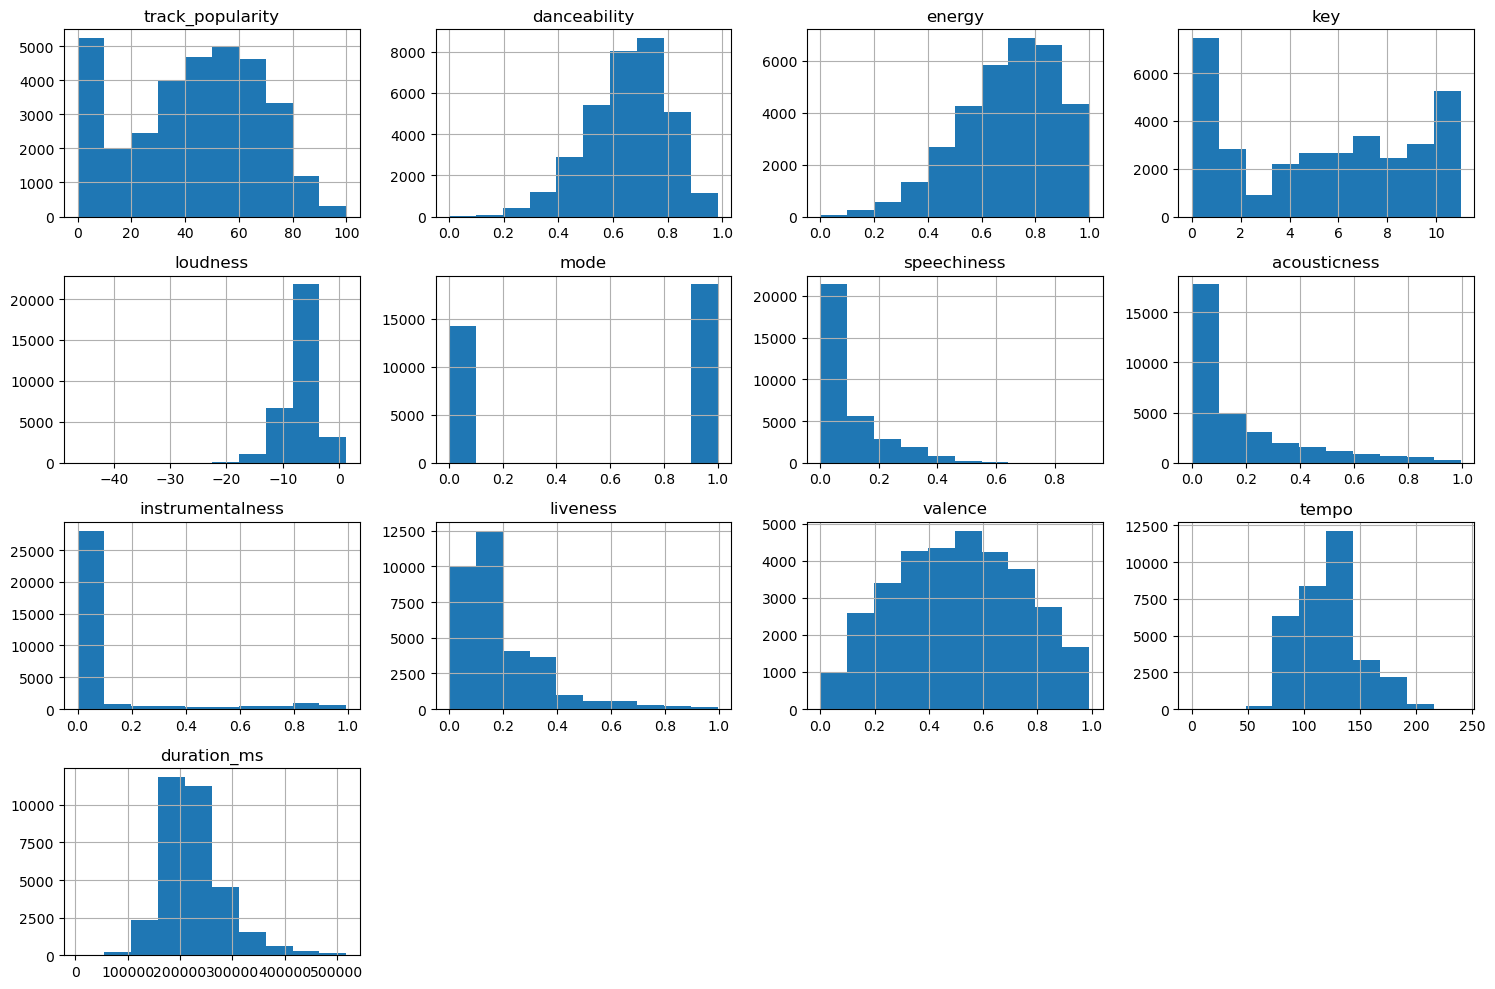

In [8]:
# Data analysis and visualization

# Plotting histogram for numerical features
data.hist(figsize=(15, 10))
plt.tight_layout()
plt.show()

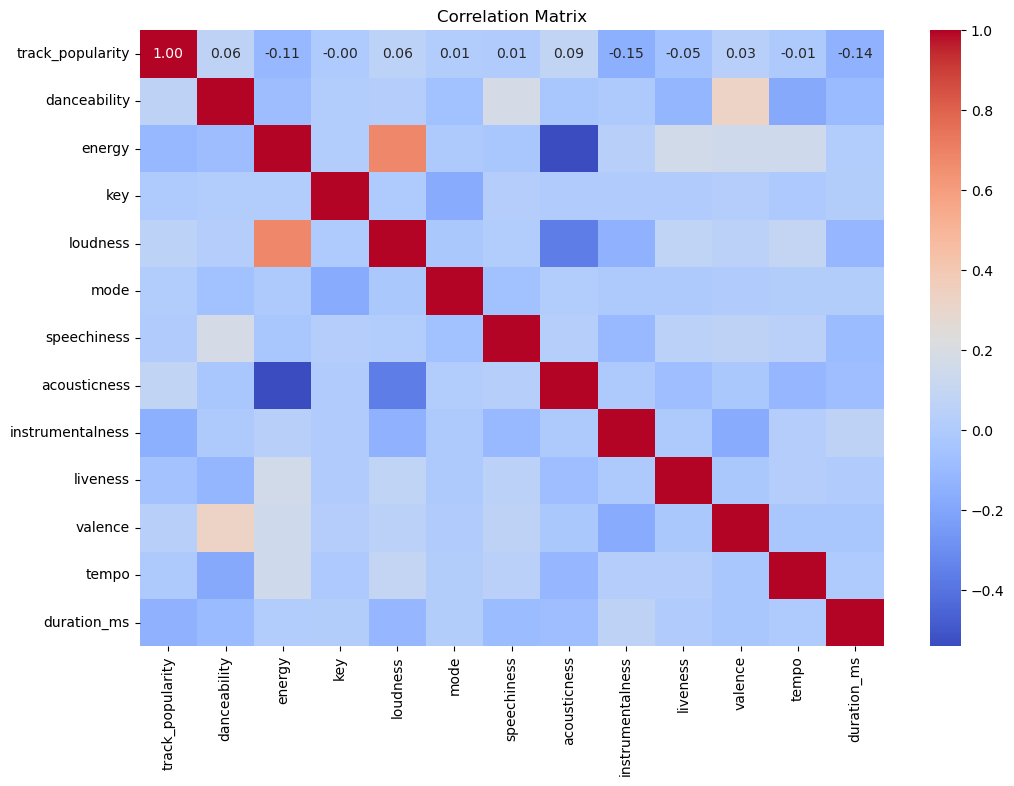

In [9]:
# Correlation matrix for numerical features
numerical_data = data.select_dtypes(include=[np.number])
corr_matrix = numerical_data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [10]:
# Clustering based on playlist genres
genre_data = data[['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']]
scaler = StandardScaler()
scaled_genre_data = scaler.fit_transform(genre_data)

C:\Users\admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\admin\anaconda3\Lib\site-packages\sklearn\clust

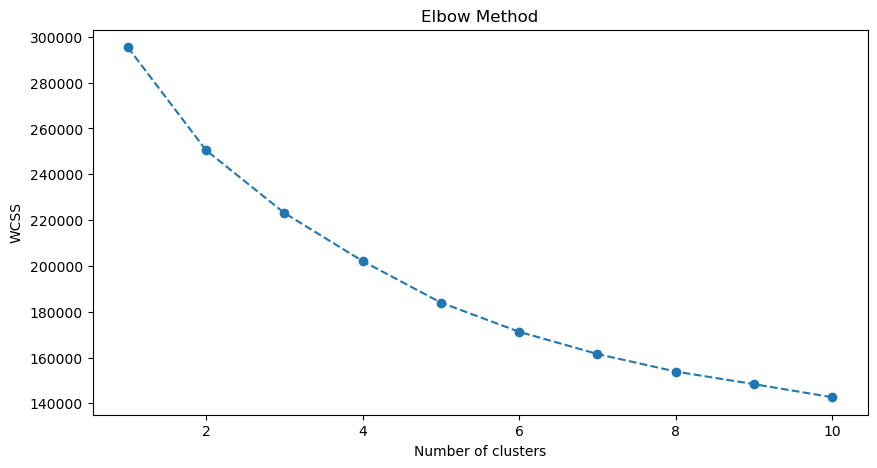

In [11]:
# Using Elbow method to find optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_genre_data)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

C:\Users\admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


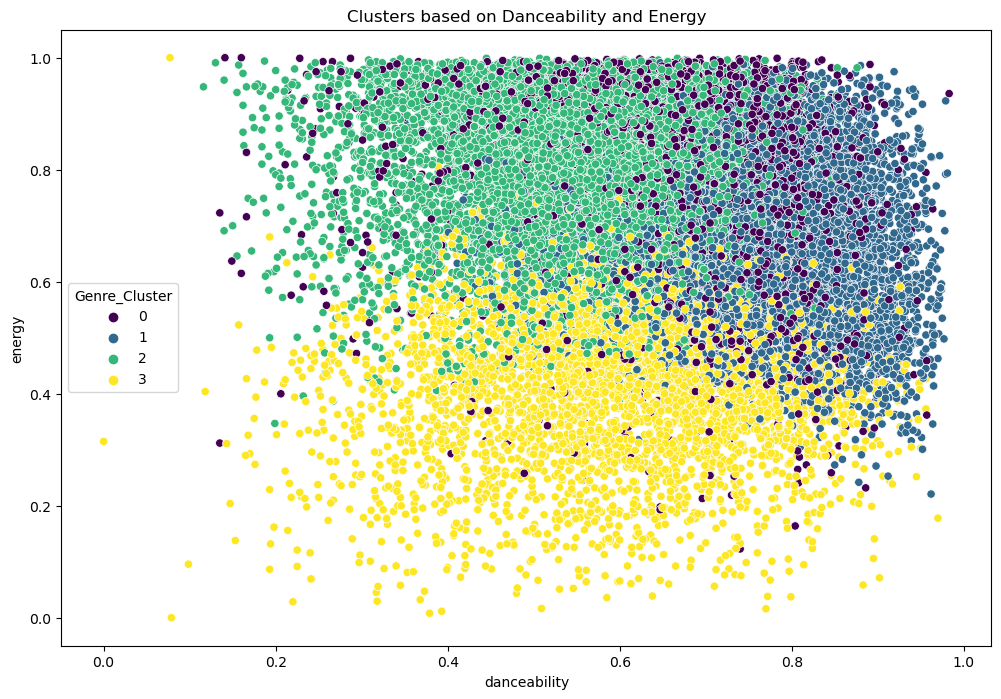

In [12]:
# Based on the Elbow method, let's choose 4 clusters
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
data['Genre_Cluster'] = kmeans.fit_predict(scaled_genre_data)

# Visualizing clusters
plt.figure(figsize=(12, 8))
sns.scatterplot(x='danceability', y='energy', data=data, hue='Genre_Cluster', palette='viridis')
plt.title('Clusters based on Danceability and Energy')
plt.show()

In [13]:
from sklearn.preprocessing import LabelEncoder

# Drop non-numerical columns
numerical_data = data.select_dtypes(include=[np.number])

# Splitting data into train and test sets
X = numerical_data.drop(['Genre_Cluster'], axis=1)
y = numerical_data['Genre_Cluster']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model building
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Model evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.9585744745659458
Confusion Matrix:
 [[ 525    1    4   12]
 [   7 2668   63   19]
 [  10   90 2092   12]
 [   6   36   12 1009]]


In [22]:
# Final recommendation system
def recommend_music(features):
    # Scaling input features
    scaled_features = scaler.transform([features])
    
    # Predicting cluster
    cluster = kmeans.predict(scaled_features)[0]
    
    # Filtering data based on cluster
    recommended_songs = data[data['Genre_Cluster'] == cluster]
    
    # Returning top 10 recommended songs
    return recommended_songs.sample(15)

# Example of how to use the recommendation system
example_features = [0.7, 0.8, -5.2, 0.1, 0.2, 0.5, 0.1, 0.6, 120]
print(recommend_music(example_features))

                     track_id  \
8235   2Vc9sEG0AbbaBychRrv7oz   
4599   3NxAxBnK66q0ZpIWeH9xlp   
10902  12mGwph2YzDIlChtq3EdXP   
17398  3VGV3n2Q7WanHnhbvjPjw8   
6178   0lwkTJnLBVWvEnxtku7Msy   
32254  51N3PusY92uUZr75v9JrCo   
20512  15a5yBoHJhHHWjKbyLO10s   
12956  5aYVqxyetmT5OYmvZCA90X   
19814  2DAULesb1U4Qz4FSTZpEUJ   
29579  66GwxT8WGVBRLoKmXH8IfE   
525    2tpWsVSb9UEmDRxAl1zhX1   
2667   1ahVFh0ViDZr8LvkEVlq3B   
599    7b4vbqgzMhbFa0wdjfftQJ   
29433  15F6s4J6eZnI9eS2yWGzyz   
30516  0ZtRAKwEaEzbApyv7vZRFd   

                                            track_name      track_artist  \
8235                                  Hood Billionaire         Rick Ross   
4599                    L.A. Story (feat. Mike Posner)       Sammy Adams   
10902                                            Alone        Marshmello   
17398                                          Runaway           Halcyon   
6178                                           Alright             Logic   
32254          

C:\Users\admin\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
